# Functions

In [1]:
def get_words(line):
    r'''
    This function takes a text and returns
    a list of lowercase words. It removes all digits
    and strips punctuation characters from the words.
    
    >>> get_words('Here are severall1000 words!\n Blub')
    ['here', 'are', 'severall', 'words', 'blub']
    
    >>> get_words('"Where are they? 10 \t 1000!?"')
    ['where', 'are', 'they']
    
    >>> get_words('\t\t\t\r\r\r\n<ada> hallo12 \r\t\t\t\t')
    ['ada', 'hallo']
    
    '''
    import re
    line = re.sub('\s*[\r\t]+','',line)
    line = line.lower()
    line = re.sub('[^+#a-z\s\'-]+','',line)

    
    words = line.split()
    return words

if __name__ == '__main__':
    import doctest
    doctest.testmod()

# Data Import

In [2]:
import pandas as pd
import json
from collections import Counter

# Columns which shall be kept from the downloaded data
columns = ['job_title', 'employer', 'origin', 'location',
           'salary', 'job_type', 'job_description',]

# Keywords to check for in the job description. Each keyword 
# gets its own column with True and False values.
languages = ['python', 'java', 'perl', 'r', 'fortran', 'sql',
             'html', 'css', 'javascript', 'c', 'c++', 'c#',
             'bioinformatician', 'bioinformatics']

#keywords for later duplicate deleting
duplicate_pattern = ['researcher', 'details', 'skills', 'successful',
                     'program', 'expected', 'strong']

#List of programming related words, later used to check if job offer
#is programming related / involves programming
prog_related = ['programming', 'programing', 'code', 'coding', 
                'computational', 'programming-language', 'script',
                'scripting', 'script-language', 'informatics'
               ]

# load nature jobs
with open('ls_jobs/nature_jobs.json', 'r') as myfile:
    nature_jobs = json.load(myfile)

# load science jobs
with open('ls_jobs/science_jobs.json', 'r') as myfile:
    science_jobs = json.load(myfile)

# Count words and add an orign entry to the science data
for entry in science_jobs:
    entry['job_description_words'] = Counter(get_words(entry['job_description']))
    entry['origin'] = 'science'

# Count words and add an orign entry to the nature data
for entry in nature_jobs:
    entry['job_description_words'] = Counter(get_words(entry['job_description']))
    entry['origin'] = 'nature'

# Combine the job data from science and nature
job_data = science_jobs+nature_jobs

# Add the entries for the keywords
for entry in job_data:
    for keyword in (languages + duplicate_pattern):
        if keyword in entry['job_description_words'].keys():
            entry[keyword] = entry['job_description_words'][keyword]
        else:
            entry[keyword] = 0
    #check if job offer is programmin related, if so set to True
    for prog_word in (prog_related + languages):
        if prog_word in entry['job_description_words'].keys():
            entry['programming_related'] = True
            #break
        else:
            entry['programming_related'] = False
            #print(entry['programming_related'])

# Read the data into a dataframe and select the specified columns
df = pd.DataFrame(job_data)
#only keep specific columns (entries of the added lists)
df = df[columns + ['programming_related'] + languages + duplicate_pattern]

#df['successful'][:10]

# Inspect data

In [3]:
#get and print number of entries in dataset pre duplicate deletion
print('Dataset before duplicate reduction')
print('Total Number of job offers/entries:')
entries_pre_del = len(df)
print(entries_pre_del)
print('Number of job offers/entries from Science:')
sci_entries_pre_del = len(df[df['origin']=='science'])
print(sci_entries_pre_del)
print('Number of job offers/entries from Nature:')
nat_entries_pre_del = len(df[df['origin']=='nature'])
print(nat_entries_pre_del)

Dataset before duplicate reduction
Total Number of job offers/entries:
3216
Number of job offers/entries from Science:
1225
Number of job offers/entries from Nature:
1991


## Remove duplicates

In [4]:
#remove completly identical entries
df[df.duplicated()==True]
df1 = df[df.duplicated()==False]

In [16]:
#delete entries which seem to be duplicates 
#according ro the word occurences
df1[df1.duplicated(subset=['job_title', 'employer',])==True]
df1 = df1[df1.duplicated(subset=['job_title', 'employer',
                           'researcher', 'details',
                           'skills', 'successful',
                           'program', 'expected',
                           'strong'])==True]

In [6]:
#get and print number of entries in dataset post duplicate deletion
print('Dataset after duplicate reduction')
print('Total Number of job offers/entries:')
print(len(df1))
print('Number of job offers/entries from Science:')
print(len(df1[df1['origin']=='science']))
print('Number of job offers/entries from Nature:')
print(len(df1[df1['origin']=='nature']))

Dataset after duplicate reduction
Total Number of job offers/entries:
3180
Number of job offers/entries from Science:
1206
Number of job offers/entries from Nature:
1974


In [8]:
len(df[df.duplicated(subset=['job_description'])==True])

57

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [11]:
df.columns.values

array(['job_title', 'employer', 'origin', 'location', 'salary', 'job_type',
       'job_description', 'programming_related', 'python', 'java', 'perl',
       'r', 'fortran', 'sql', 'html', 'css', 'javascript', 'c', 'c++',
       'c#', 'bioinformatician', 'bioinformatics', 'researcher', 'details',
       'skills', 'successful', 'program', 'expected', 'strong'], dtype=object)

In [12]:
len(df[df.duplicated(subset=['job_title', 'employer', 'salary'])==True])

126

# Question 1: Which programming languages are mentioned most in job ads for bioinformaticians?

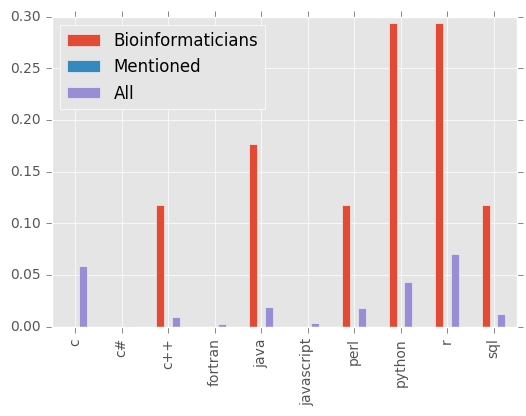

In [13]:
bioinformatician = df.loc[df['job_type'] == 'Bioinformatician']
bio = bioinformatician[['java', 'python', 'perl', 'r', 
                        'fortran','sql', 'javascript', 'c++', 'c', 'c#']]

mentioned_bioinf = df.loc[df['bioinformatics']]
mentioned_bioinf = mentioned_bioinf[['java', 'python', 'perl', 'r', 
                        'fortran','sql', 'javascript', 'c++', 'c', 'c#']]

#print(bioinformatician.ix[262][['job_description']])
#print(bioinformatician.loc[26, 'job_description'])

all_jobs = df[['java', 'python', 'perl', 'r', 
               'fortran', 'javascript', 'c++', 'c', 'c#','sql']]

plotframe = pd.concat([bio.sum()/len(bio),
                       mentioned_bioinf.sum()/len(mentioned_bioinf),
                       all_jobs.sum()/len(all_jobs)], axis=1)

plotframe.set_index(bio.sum().index)
plotframe = plotframe.rename(index = str, columns={0:'Bioinformaticians',
                                                   1:'Mentioned',
                                                   2:'All'})
plotframe.plot(kind='bar')

In [14]:
df['sql']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3186    0
3187    0
3188    0
3189    0
3190    0
3191    0
3192    0
3193    0
3194    0
3195    0
3196    0
3197    0
3198    0
3199    0
3200    0
3201    0
3202    0
3203    0
3204    0
3205    0
3206    0
3207    0
3208    0
3209    0
3210    0
3211    0
3212    0
3213    0
3214    0
3215    0
Name: sql, dtype: int64